# Hacktiv8 Phase 1: Milestone 2

---

## Perkenalan

Nama : Salman Faishal

Batch : 017

Dataset : [Job Placement Dataset](https://www.kaggle.com/datasets/ahsan81/job-placement-dataset)

Deployment :[Job Placement Prediction](https://huggingface.co/spaces/salmanfaishal27/Job-Placement-Prediction)

Objective : membuat classifikasi apakah seseorang akan dipekerjakan di perusahaan atau tidak

Problem statement : Sebuah perusahaan ingin merekrut pekerja dengan kualitas sdm yang bagus namun perusahaan kesulitan untuk menilai pelamar yang memiliki kualitas yang baik, shingga dibuat model klasifikasi untuk menentukan apakah pelamar layak berada di perusahaan ini atau tidak   

| Feature | Description |
|---|---|
| gender | Gender of the candidate. |
| ssc_percentage | Senior secondary exams percentage (10th Grade). |
| ssc_board | Board of education for ssc exams. |
| hsc_percentage | Higher secondary exams percentage (12th Grade). |
| hsc_board | Board of education for hsc exams. |
| hsc_subject | Subject of study for hsc. |
| degree_percentage | Percentage of marks in undergrad degree. |
| undergrad_degree | Undergrad degree majors. |
| work_experience | Past work experience. |
| emp_test_percentage | Aptitude test percentage. |
| specialisation | Postgrad degree majors - (MBA specialization). |
| mba_percent | Percentage of marks in MBA degree. |
| status (**TARGET**) | Status of placement. Placed / Not Placed. |

## Import Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix, precision_score, f1_score, roc_curve, roc_auc_score, mean_absolute_error
from feature_engine.outliers import Winsorizer
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
import pickle


## Data Loading

In [2]:
data = pd.read_csv('Job_Placement_Data.csv')

In [3]:
data.head()

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


In [4]:
data.tail()

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status
210,M,80.6,Others,82.0,Others,Commerce,77.6,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed
211,M,58.0,Others,60.0,Others,Science,72.0,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed
212,M,67.0,Others,67.0,Others,Commerce,73.0,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed
213,F,74.0,Others,66.0,Others,Commerce,58.0,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed
214,M,62.0,Central,58.0,Others,Science,53.0,Comm&Mgmt,No,89.0,Mkt&HR,60.22,Not Placed


In [5]:
data.shape

(215, 13)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               215 non-null    object 
 1   ssc_percentage       215 non-null    float64
 2   ssc_board            215 non-null    object 
 3   hsc_percentage       215 non-null    float64
 4   hsc_board            215 non-null    object 
 5   hsc_subject          215 non-null    object 
 6   degree_percentage    215 non-null    float64
 7   undergrad_degree     215 non-null    object 
 8   work_experience      215 non-null    object 
 9   emp_test_percentage  215 non-null    float64
 10  specialisation       215 non-null    object 
 11  mba_percent          215 non-null    float64
 12  status               215 non-null    object 
dtypes: float64(5), object(8)
memory usage: 22.0+ KB


Dataset ini memiliki 13 kolom dengan 2 type data yaitu:
- 5 kolom dengan tipe data float
- 8 kolom dengan tipe data object

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ssc_percentage,215.0,67.303395,10.827205,40.89,60.600,67.0,75.700,89.40
hsc_percentage,215.0,66.333163,10.897509,37.00,60.900,65.0,73.000,97.70
degree_percentage,215.0,66.370186,7.358743,50.00,61.000,66.0,72.000,91.00
emp_test_percentage,215.0,72.100558,13.275956,50.00,60.000,71.0,83.500,98.00
mba_percent,215.0,62.278186,5.833385,51.21,57.945,62.0,66.255,77.89


dari informasi diatas dapat dilihat rata rata, nilai minimum, nilai maksimum, quartile 1, median, quartile 3, terlihat juga mungkin ada sedikit outlier pada 5 kolom numerik ini

### Missing Value Check

In [8]:
data.isna().sum()

gender                 0
ssc_percentage         0
ssc_board              0
hsc_percentage         0
hsc_board              0
hsc_subject            0
degree_percentage      0
undergrad_degree       0
work_experience        0
emp_test_percentage    0
specialisation         0
mba_percent            0
status                 0
dtype: int64

pada dataset ini tidak terdapat missing value

### Data Duplicate

In [9]:
data.duplicated().sum()

0

pada dataset ini tidak terdapat data duplikat

## Exploratory Data Analysis (EDA)

### Status

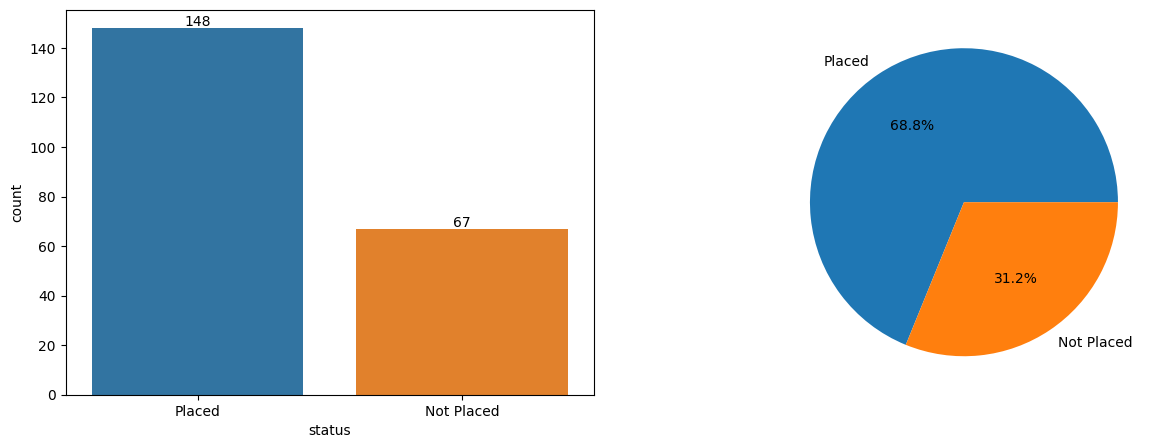

In [10]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
ax = sns.countplot(x='status', data = data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,height + 1, '{:1.0f}'.format(height), ha="center")

plt.subplot(1,2,2)
plt.pie(data.status.value_counts(), labels= data.status.value_counts().index, autopct = '%1.1f%%')
plt.show()

Kolom status atau target ini memiliki 2 value yaitu placed dan not placed dimana plcaed memiliki jumlah data 148 atau 69% dan not placed memiliki jumlah data 67 atau 31% dapat disimpulkan juga perbandingan jumlah persentasi dari kedua value ini memiliki selisih yang jauh atau bisa dikatakan imbalance data

### Gender

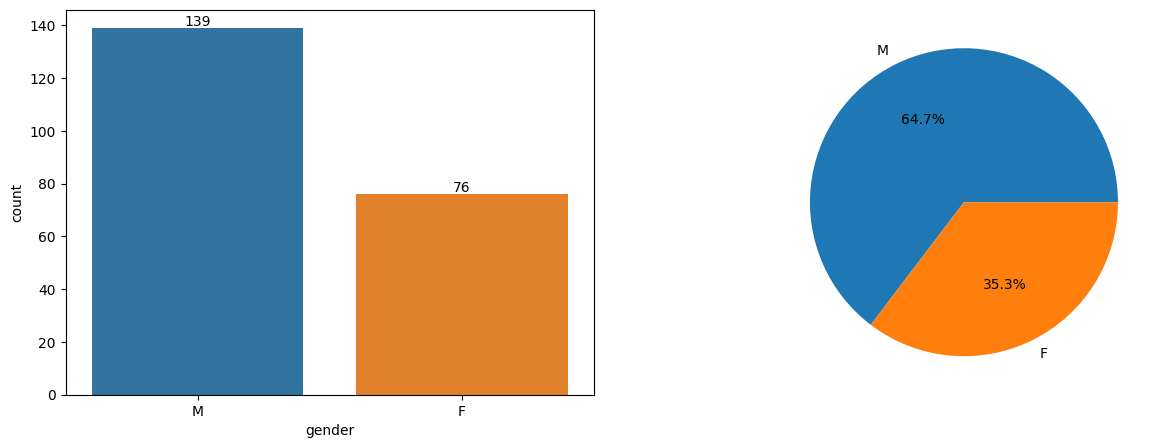

In [11]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
ax = sns.countplot(x='gender', data = data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,height + 1, '{:1.0f}'.format(height), ha="center")

plt.subplot(1,2,2)
plt.pie(data.gender.value_counts(), labels= data.gender.value_counts().index, autopct = '%1.1f%%')
plt.show()

pada dataset ini jenis kelamin laki laki berjumlah 139 atau 65% dan perempuan sebanyak 76 atau 35%

### ssc_percentage

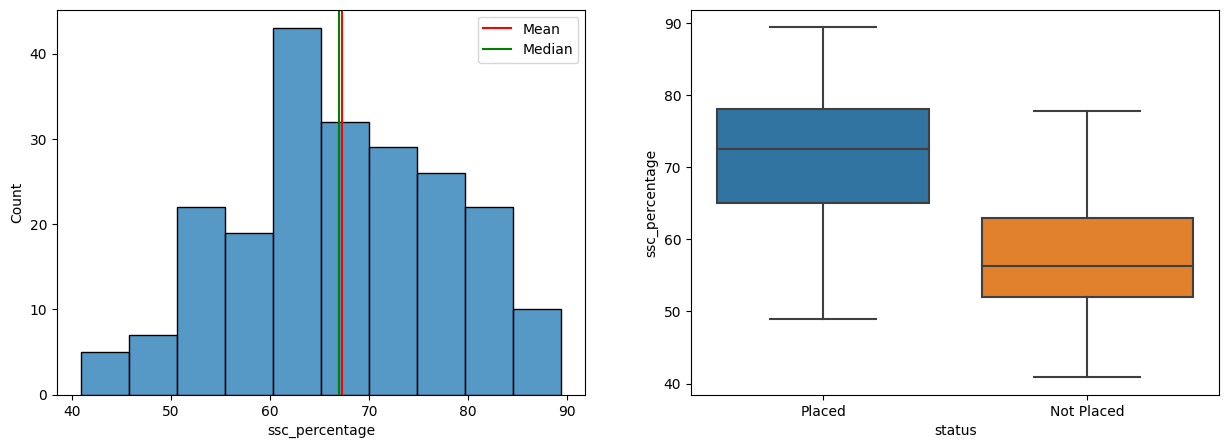

Skewness : -0.13264949031456927
Mean : 67.30339534883721
Median : 67.0


In [12]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(data.ssc_percentage)
plt.axvline(data.ssc_percentage.mean(), color='r', label='Mean')
plt.axvline(data.ssc_percentage.median(), color='g', label='Median')
plt.legend()

plt.subplot(1,2,2)
sns.boxplot(x='status', y='ssc_percentage', data = data)
plt.show()
print('Skewness :', data.ssc_percentage.skew())
print('Mean :', data.ssc_percentage.mean())
print('Median :', data.ssc_percentage.median())

persentase nilai yang diperoleh oleh seseorang dari total nilai dari ujian SSC rata rata 67.3, dari bentuk distribusi kolom ssc_percentage ini normal karena nilai skewness -0.13 atau masih diantara -0.5 dan 0.5, terlihat juga ada korelasi antara kolom ssc_percentage dengan kolom status, dimana semakin tinggi seseorang mendapatkan nilai ssc maka kemungkinan besar orang tersebut diterima bekerja.

### ssc_board  

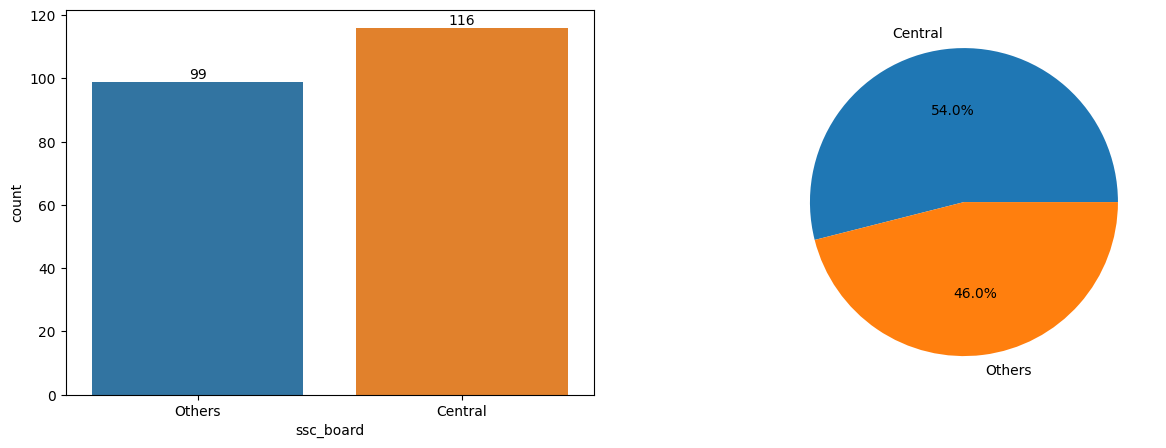

In [13]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
ax = sns.countplot(x='ssc_board', data = data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,height + 1, '{:1.0f}'.format(height), ha="center")

plt.subplot(1,2,2)
plt.pie(data.ssc_board.value_counts(), labels= data.ssc_board.value_counts().index, autopct = '%1.1f%%')
plt.show()

badan pengelola yang bertanggung jawab untuk menyelenggarakan ujian SSC yaitu others(gabungan dari beberapa pengelola) dan central dimana others memiliki data sebanyak 99 atau 46% dan central sebanyak 116 atau 54%

### hsc_percentage

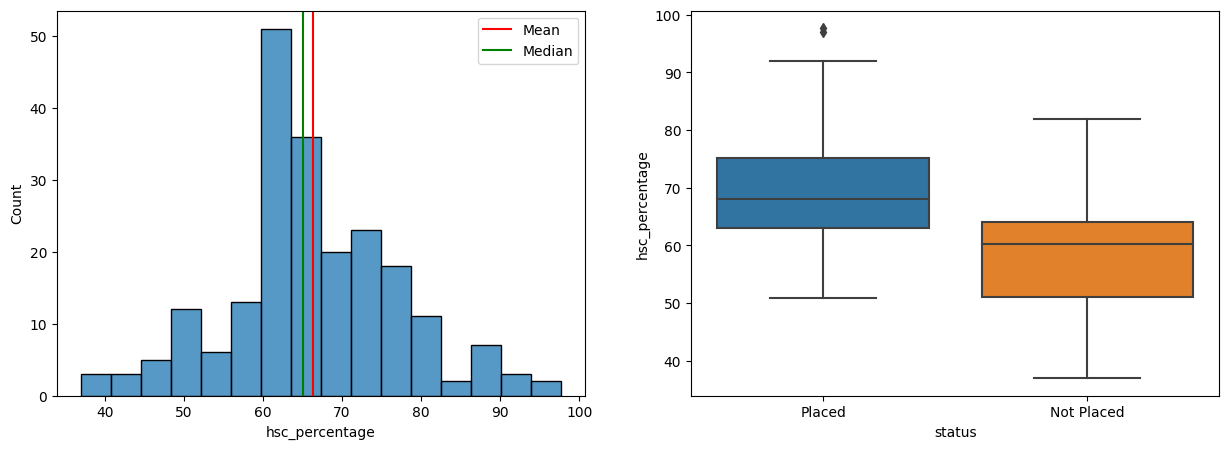

Skewness : 0.16363913146416115
Mean : 66.33316279069768
Median : 65.0


In [14]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(data.hsc_percentage)
plt.axvline(data.hsc_percentage.mean(), color='r', label='Mean')
plt.axvline(data.hsc_percentage.median(), color='g', label='Median')
plt.legend()

plt.subplot(1,2,2)
sns.boxplot(x='status', y='hsc_percentage', data = data)
plt.show()
print('Skewness :', data.hsc_percentage.skew())
print('Mean :', data.hsc_percentage.mean())
print('Median :', data.hsc_percentage.median())

persentase nilai yang diperoleh oleh seseorang dari total nilai dari ujian HSC rata rata 66.3, dari bentuk distribusi kolom hsc_percentage ini normal karena nilai skewness 0.16 atau masih diantara -0.5 dan 0.5, terlihat juga ada korelasi antara kolom hsc_percentage dengan kolom status, dimana semakin tinggi seseorang mendapatkan nilai HSC maka kemungkinan besar orang tersebut diterima bekerja.

### hsc_board

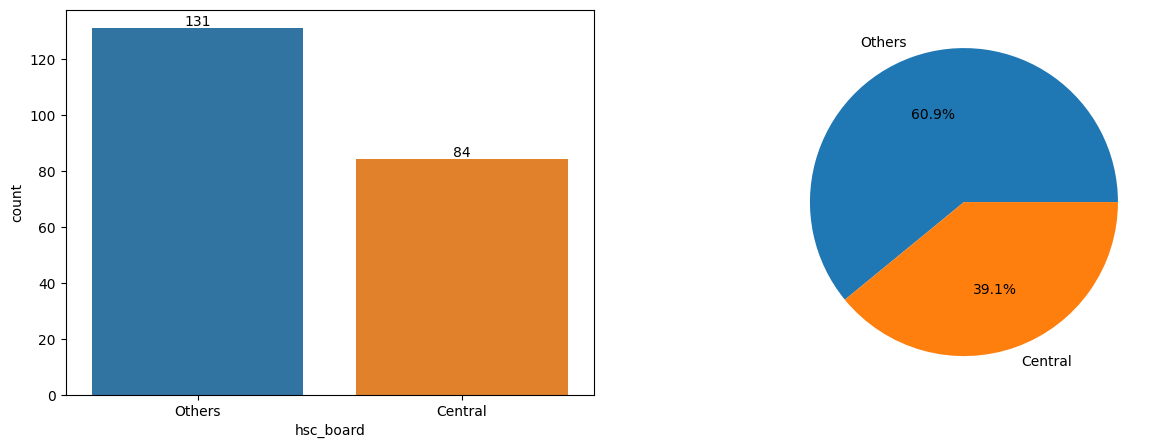

In [15]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
ax = sns.countplot(x='hsc_board', data = data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,height + 1, '{:1.0f}'.format(height), ha="center")

plt.subplot(1,2,2)
plt.pie(data.hsc_board.value_counts(), labels= data.hsc_board.value_counts().index, autopct = '%1.1f%%')
plt.show()

badan pengelola yang bertanggung jawab untuk menyelenggarakan ujian HSC yaitu others(gabungan dari beberapa pengelola) dan central dimana others memiliki data sebanyak 131 atau 61% dan central sebanyak 84 atau 39%

### hsc_subject

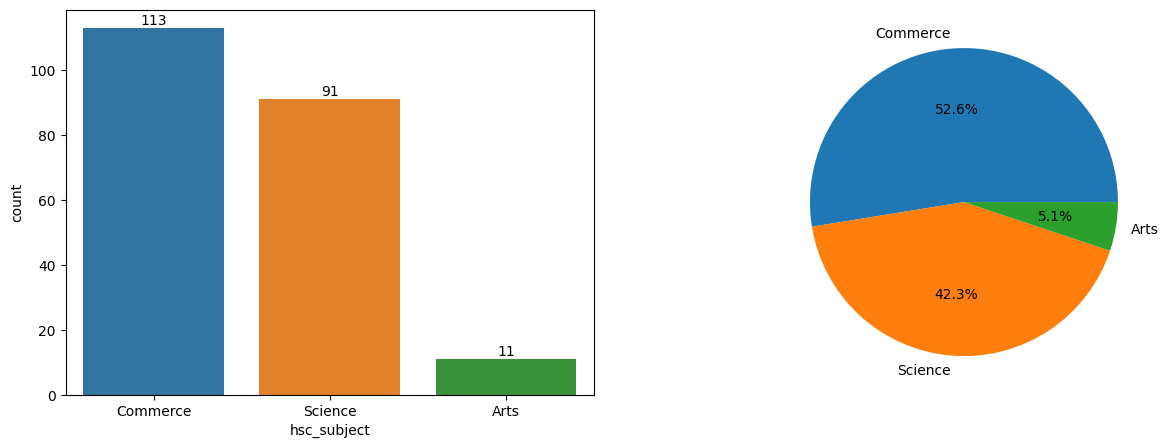

In [16]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
ax = sns.countplot(x='hsc_subject', data = data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,height + 1, '{:1.0f}'.format(height), ha="center")

plt.subplot(1,2,2)
plt.pie(data.hsc_subject.value_counts(), labels= data.hsc_subject.value_counts().index, autopct = '%1.1f%%')
plt.show()

mata pelajaran yang diujikan dalam ujian HSC ini terdapat 3 yaitu Commerce, Science dan Arts dimana Commerce memiliki jumlah tertinggi dengan banyak data 113 atau 53%, Science dengan data sebanyak 91 atau 42% dan Arts memiliki data sebanyak 11 atau 5%

### degree_percentage

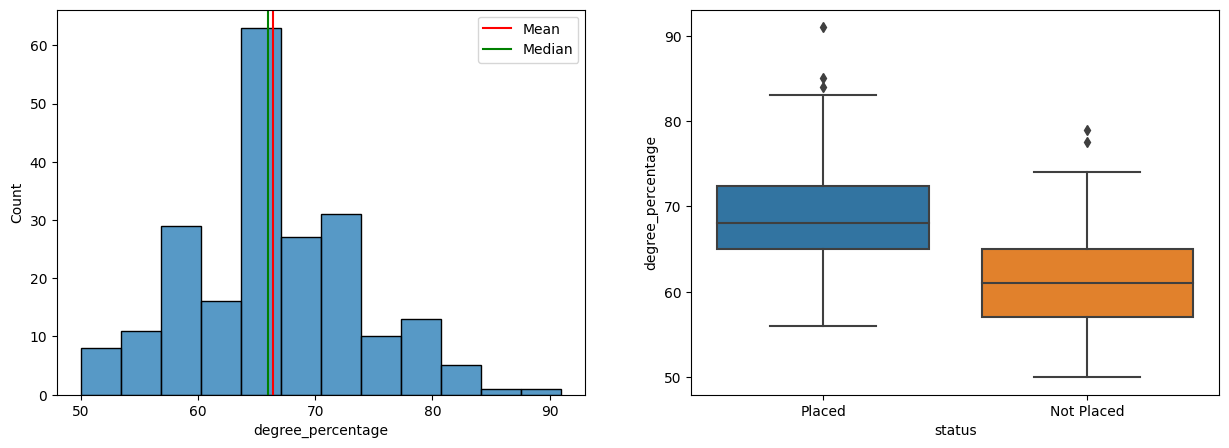

Skewness : 0.24491716177925815
Mean : 66.37018604651163
Median : 66.0


In [17]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(data.degree_percentage)
plt.axvline(data.degree_percentage.mean(), color='r', label='Mean')
plt.axvline(data.degree_percentage.median(), color='g', label='Median')
plt.legend()

plt.subplot(1,2,2)
sns.boxplot(x='status', y='degree_percentage', data = data)
plt.show()
print('Skewness :', data.degree_percentage.skew())
print('Mean :', data.degree_percentage.mean())
print('Median :', data.degree_percentage.median())

nilai yang diperoleh oleh seseorang dari total nilai dari program sarjana atau perguruan tinggi rata rata 66.3, bentuk distribusi dari kolom degree_percentage ini adalah normal karena nilai skewness 0.24 atau masih diantara -0.5 dan 0.5, terlihat juga ada korelasi antara kolom degree_percentage dengan kolom status, dimana semakin tinggi seseorang mendapatkan nilai maka kemungkinan besar orang tersebut diterima bekerja.

### undergrad_degree

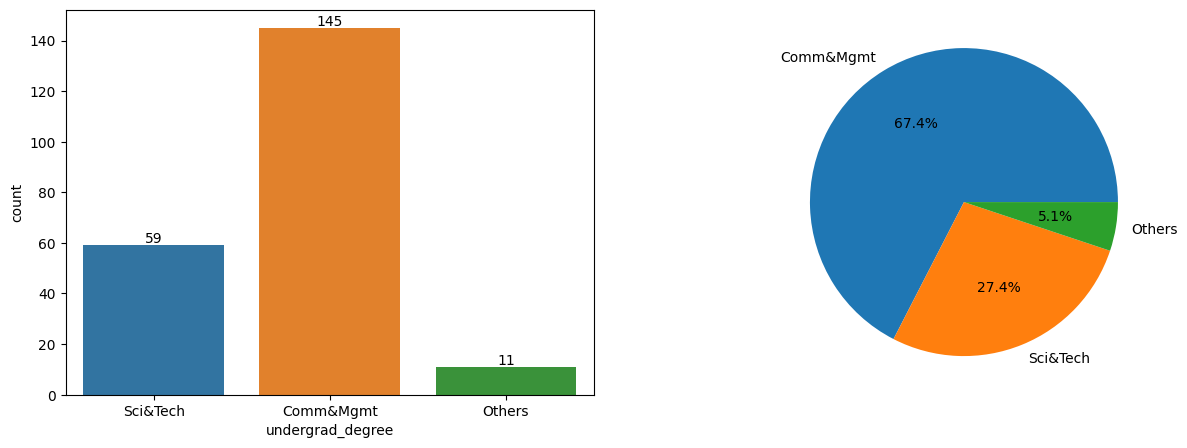

In [18]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
ax = sns.countplot(x='undergrad_degree', data = data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,height + 1, '{:1.0f}'.format(height), ha="center")

plt.subplot(1,2,2)
plt.pie(data.undergrad_degree.value_counts(), labels= data.undergrad_degree.value_counts().index, autopct = '%1.1f%%')
plt.show()

gelar sarjana yang paling banyak adalah comm&mgmt atau communication and management dengan data sebanyal 145 atau 27%, Sci&Tech atau Science and Technology dengan data sebanyak 59 atau 67% dan dari gelar lain sebanyak 11 atau 5%

### work_experience

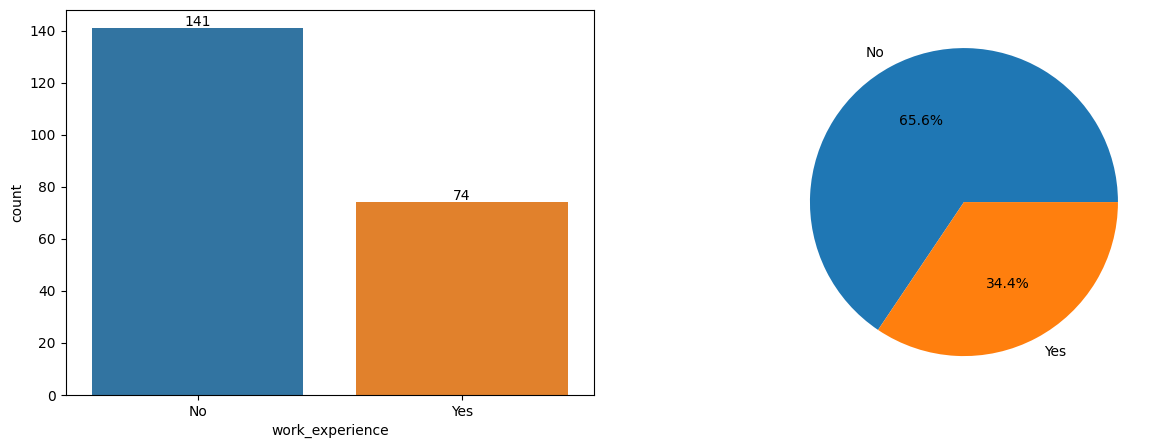

In [19]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
ax = sns.countplot(x='work_experience', data = data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,height + 1, '{:1.0f}'.format(height), ha="center")

plt.subplot(1,2,2)
plt.pie(data.work_experience.value_counts(), labels= data.work_experience.value_counts().index, autopct = '%1.1f%%')
plt.show()

dari olot diatas dapat dilihat bahwa kebanyakan orang belum memiliki pengalaman kerja, ada sebanyak 141 orang atau 66% belum memiliki pengalaman kerja, dan sebanyak 74 orang atau 34% sudah memiliki pengalaman kerja

### emp_test_percentage

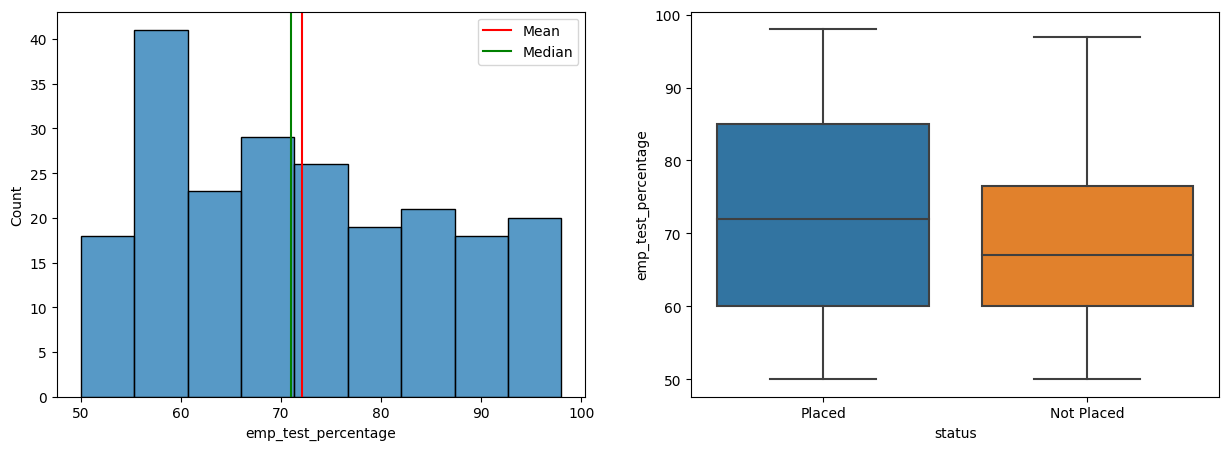

Skewness : 0.28230815846982243
Mean : 72.10055813953488
Median : 71.0


In [20]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(data.emp_test_percentage)
plt.axvline(data.emp_test_percentage.mean(), color='r', label='Mean')
plt.axvline(data.emp_test_percentage.median(), color='g', label='Median')
plt.legend()

plt.subplot(1,2,2)
sns.boxplot(x='status', y='emp_test_percentage', data = data)
plt.show()
print('Skewness :', data.emp_test_percentage.skew())
print('Mean :', data.emp_test_percentage.mean())
print('Median :', data.emp_test_percentage.median())

nilai yang diperoleh oleh seseorang dari hasil test aptitude rata rata 72, bentuk distribusi dari kolom emp_test_percentage ini adalah normal karena nilai skewness 0.28 atau masih diantara -0.5 dan 0.5, terlihat juga tidak ada korelasi antara kolom emp_test_percentage dengan kolom status.

### specialisation

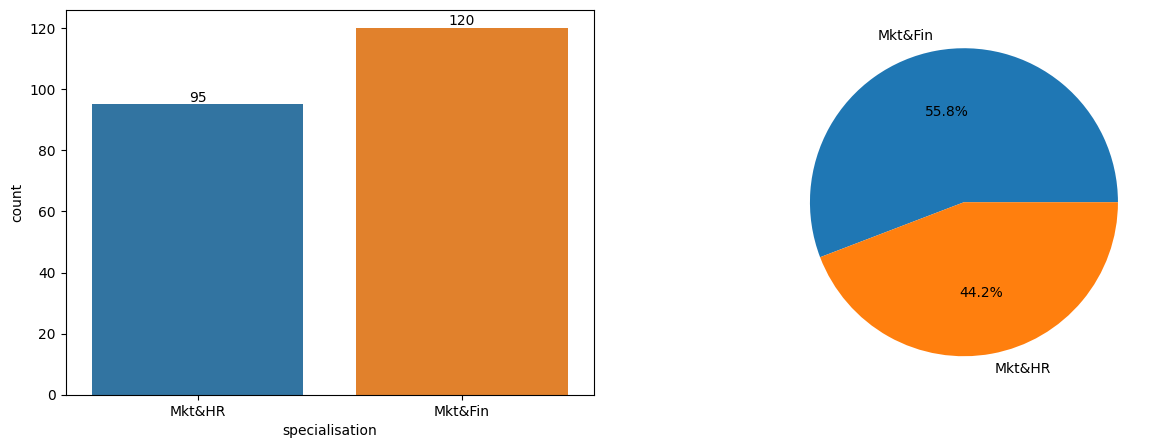

In [21]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
ax = sns.countplot(x='specialisation', data = data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,height + 1, '{:1.0f}'.format(height), ha="center")

plt.subplot(1,2,2)
plt.pie(data.specialisation.value_counts(), labels= data.specialisation.value_counts().index, autopct = '%1.1f%%')
plt.show()

dari spesialisasi, yang paling banyak adalah Mkt&Fin atau marketing and finance dimana memiliki data sebanyak 120 atau 56% dan untuk Mkt&HR atau marketing and Human Resource memiliki data sebanyak 95 atau 44%

### mba_percent

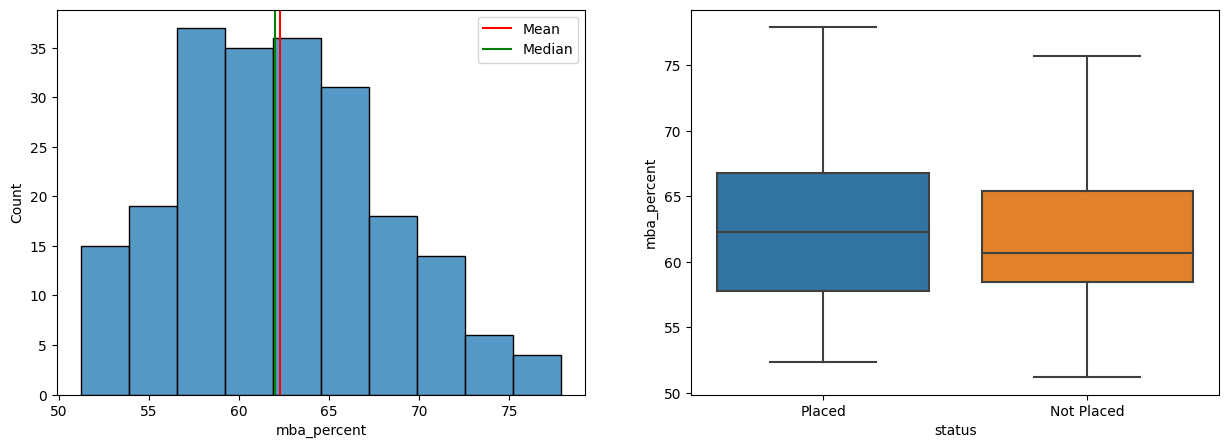

Skewness : 0.31357565317840763
Mean : 62.278186046511635
Median : 62.0


In [22]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(data.mba_percent)
plt.axvline(data.mba_percent.mean(), color='r', label='Mean')
plt.axvline(data.mba_percent.median(), color='g', label='Median')
plt.legend()

plt.subplot(1,2,2)
sns.boxplot(x='status', y='mba_percent', data = data)
plt.show()
print('Skewness :', data.mba_percent.skew())
print('Mean :', data.mba_percent.mean())
print('Median :', data.mba_percent.median())

nilai yang diperoleh seseorang dari total nilai dalam program pascasarjana rata rata 62, bentuk distribusi dari kolom mba_percent ini adalah normal karena nilai skewness 0.31 atau masih diantara -0.5 dan 0.5, terlihat juga tidak ada korelasi antara kolom mba_percent dengan kolom status.

### Correlation Matrix

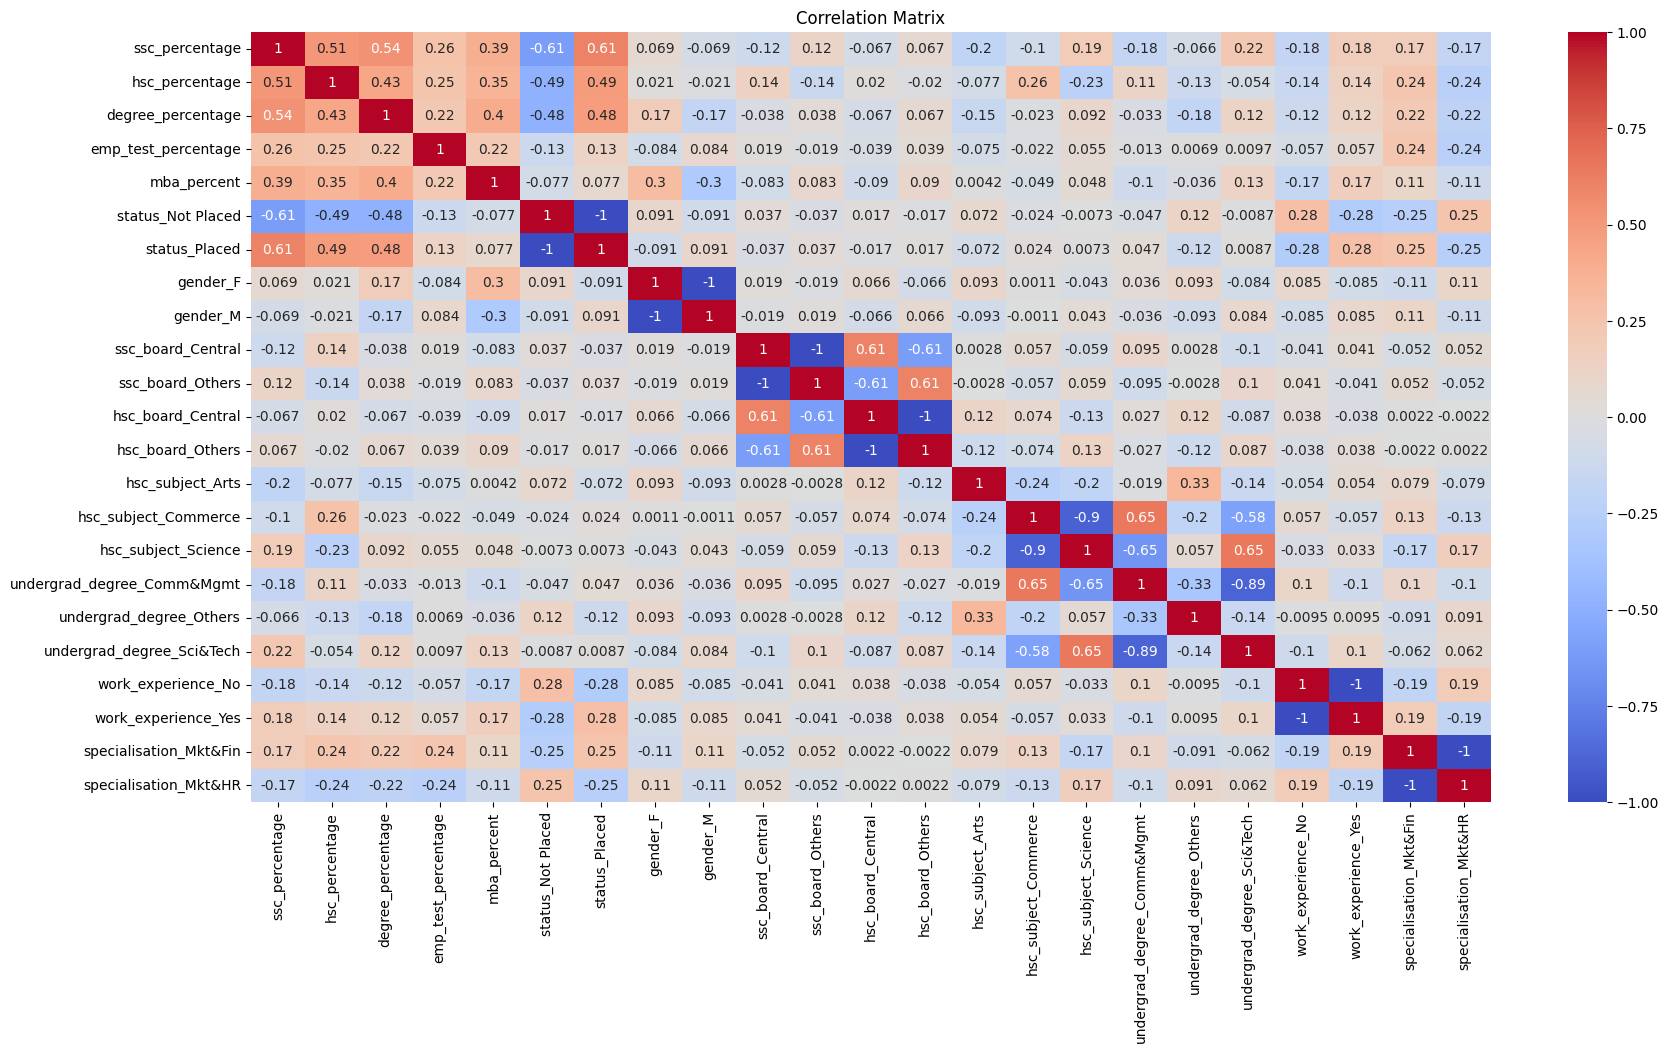

In [23]:
corr = pd.concat([data[['ssc_percentage','hsc_percentage','degree_percentage','emp_test_percentage','mba_percent']], \
                 pd.get_dummies(data[['status','gender','ssc_board','hsc_board','hsc_subject','undergrad_degree','work_experience','specialisation']])], axis=1).corr()
plt.figure(figsize=(20, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Dari correlation matrix dapat dilihat bahwa kolom target memiliki korelasi dengan kolom `ssc_percentage`, `hsc_percentage`, `degree_percentage`, `work_experience` dan `specialisation`, kolom kolom ini akan dijadikan feature

## Data Preprocessing

### Split Data

Pada bagian ini dilakukan pemisahan data antara data train dan data test dengan perbandingan 70% untuk data train dan 30% untuk data test

In [24]:
df_train, df_test = train_test_split(data, test_size=0.3, random_state=27, stratify=data.status)

### Missing Value

In [25]:
df_train.isna().sum()

gender                 0
ssc_percentage         0
ssc_board              0
hsc_percentage         0
hsc_board              0
hsc_subject            0
degree_percentage      0
undergrad_degree       0
work_experience        0
emp_test_percentage    0
specialisation         0
mba_percent            0
status                 0
dtype: int64

In [26]:
df_test.isna().sum()

gender                 0
ssc_percentage         0
ssc_board              0
hsc_percentage         0
hsc_board              0
hsc_subject            0
degree_percentage      0
undergrad_degree       0
work_experience        0
emp_test_percentage    0
specialisation         0
mba_percent            0
status                 0
dtype: int64

Dataset ini tidak memiliki missing value

### Outliers

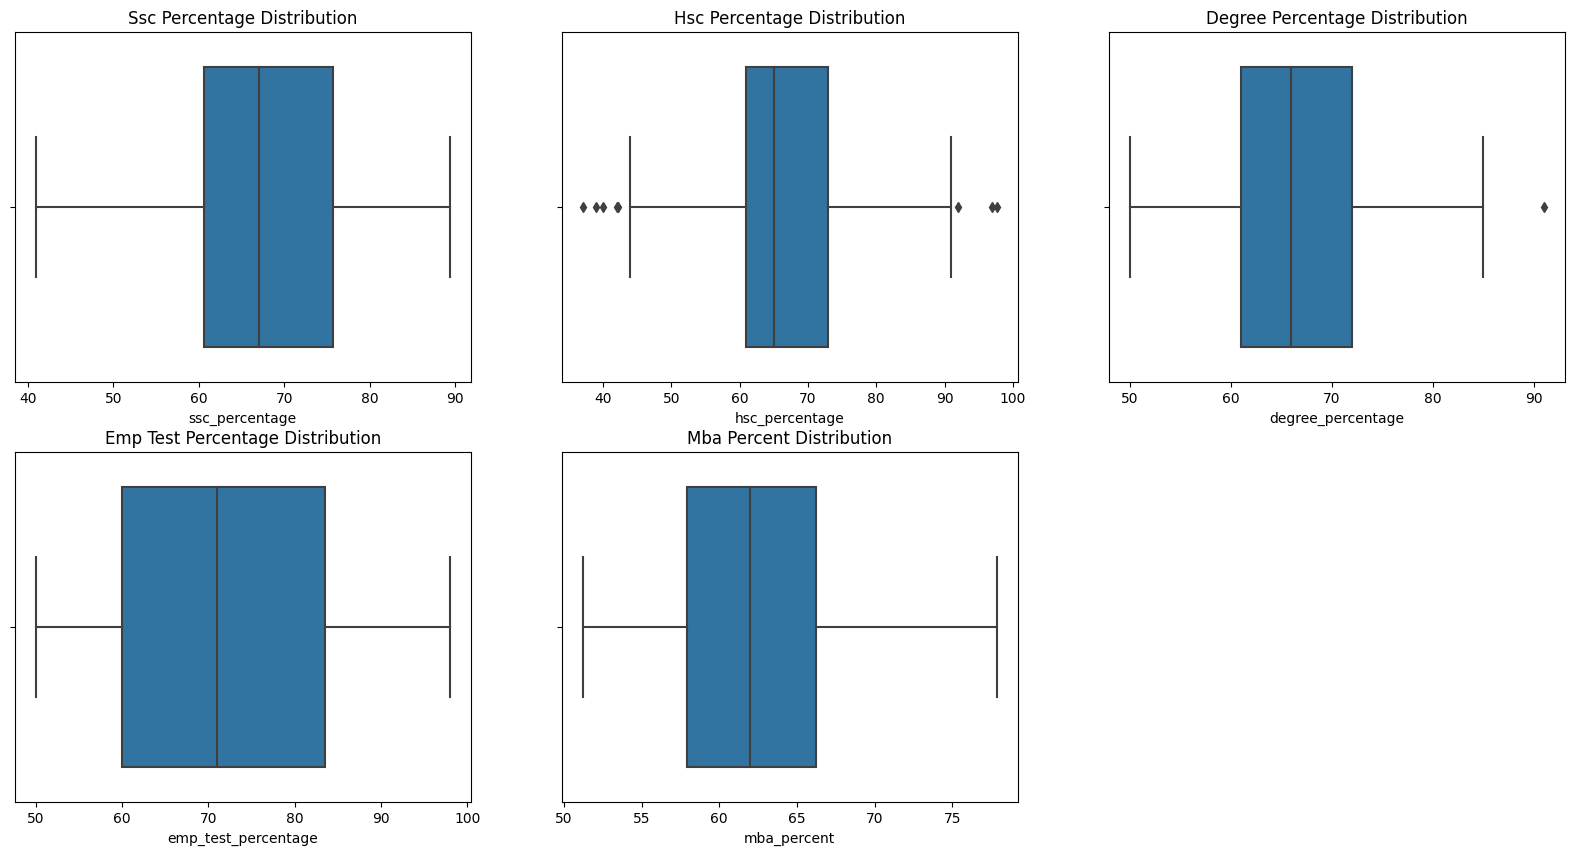

In [27]:
col_out = data[['ssc_percentage','hsc_percentage','degree_percentage', 'emp_test_percentage','mba_percent']]
plt.figure(figsize=(20, 10))
for col in col_out:
    plt.subplot(2, 3, col_out.columns.get_loc(col) + 1)
    sns.boxplot(x=col, data=col_out)
    plt.title(f"{col.replace('_', ' ').title()} Distribution")
plt.show()

dari boxplot diatas terdapat 2 kolom yang memiliki outlier yaitu kolom hsc_percentage dan degree_percentage

In [28]:
# Func untuk deteksi outlier
def upper_lower(df, col):
    IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
    upper_limit = df[col].quantile(0.75) + 1.5 * IQR
    lower_limit = df[col].quantile(0.25) - 1.5 * IQR
    return df[(df[col] < lower_limit) | (df[col] > upper_limit)]

In [29]:
# Check Outliers
cols = df_train[['ssc_percentage','hsc_percentage','degree_percentage', 'emp_test_percentage','mba_percent']]
cols = cols.columns
outlier_precentage = pd.DataFrame(columns=['Column', 'Outlier Precentage'])
for i in range(len(cols)):
    outlier_precentage.loc[i] = [cols[i], round(upper_lower(df_train, cols[i]).shape[0] / df_train.shape[0] * 100, 2)]
outlier_precentage

,Column,Outlier Precentage
0,ssc_percentage,0.00
1,hsc_percentage,2.00
2,degree_percentage,0.67
3,emp_test_percentage,0.00
4,mba_percent,0.00


In [30]:
data_outlier = upper_lower(df_train, col='hsc_percentage' )
data_outlier

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status
49,F,50.0,Others,37.0,Others,Arts,52.0,Others,No,65.0,Mkt&HR,56.11,Not Placed
120,M,58.0,Others,40.0,Others,Science,59.0,Comm&Mgmt,No,73.0,Mkt&HR,58.81,Not Placed
42,M,49.0,Others,39.0,Central,Science,65.0,Others,No,63.0,Mkt&Fin,51.21,Not Placed


ternyata yang menjadi outlier pada kolom hsc_percentage adalah data yang memiliki nilai hsc kurang dari 40

In [31]:
data_outlier2 = upper_lower(df_train, col='degree_percentage' )
data_outlier2

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status
197,F,83.96,Others,53.0,Others,Science,91.0,Sci&Tech,No,59.32,Mkt&HR,69.71,Placed


pada kolom degree_percentage yang membuat kolom ini memiliki outlier adalah nilai 91 pada degree_percentage

In [33]:
df_train

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed
51,M,54.40,Central,61.12,Central,Commerce,56.20,Comm&Mgmt,No,67.0,Mkt&HR,62.65,Not Placed
109,M,52.00,Central,63.00,Others,Science,65.00,Sci&Tech,Yes,86.0,Mkt&HR,56.09,Not Placed
160,M,87.00,Central,74.00,Central,Science,65.00,Sci&Tech,Yes,75.0,Mkt&HR,72.29,Placed
21,F,79.00,Others,76.00,Others,Commerce,85.00,Comm&Mgmt,No,95.0,Mkt&Fin,69.06,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,M,66.00,Central,76.00,Central,Commerce,72.00,Comm&Mgmt,Yes,84.0,Mkt&HR,58.95,Placed
154,M,53.00,Central,63.00,Others,Science,60.00,Comm&Mgmt,Yes,70.0,Mkt&Fin,53.20,Placed
172,M,73.00,Others,58.00,Others,Commerce,56.00,Comm&Mgmt,No,84.0,Mkt&HR,52.64,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed


### Feature Selection

In [34]:
X_train = df_train.drop(columns=['gender','ssc_board','hsc_board','hsc_subject','undergrad_degree','work_experience','status']) # Feature
y_train = df_train[['status']] # Target


X_test = df_test.drop(columns=['gender','ssc_board','hsc_board','hsc_subject','undergrad_degree','work_experience', 'status']) # Feature
y_test = df_test[['status']] # Target

### Pipeline

pada bagian ini dibuat pipeline untuk melakukan handling outlier menggunakan winsorizer dengan metode capping menggunakan IQR dan fold 1.5 pada kolom hsc_percentage dan degree_percentage, selanjutnya melakukan scaling menggunakan StandardScaler, lalu melakukan encoding menggunakan OneHotEncoding, lalu menggabungkan hasil dari handling outlier, scaling dan encoding menggunakan ColumnTransformer dengan variabel preprocessor

In [35]:
# Numeric Features Scaling
num_pipe = Pipeline([('outlier', Winsorizer(capping_method='iqr', tail='both', fold=1.5, variables=['hsc_percentage', 'degree_percentage'])),
                     ('scaling', StandardScaler())])

# Categorical Features Encoding
cat_pipe = Pipeline([('encode', OneHotEncoder())])

# Preprocessing Pipeline
preprocessor = ColumnTransformer([
    ('num',num_pipe, X_train.select_dtypes(include=['float64', 'int64']).columns),
    ('cat',cat_pipe, X_train.select_dtypes(include=['object']).columns)
])

## Model Definition

selanjutnya membuat pipeline untuk model, disini model yang dibuat berjumlah 7 yaitu `SVM`, `Decision Tree`, `Random Forest`, `K-Nearest Neighbor`, `Naive Bayes`, `Gradient Boosting`, `Logistic Regression`.

In [36]:
# Pembuatan Model
svc_pipe = Pipeline([('preprocessing', preprocessor),('classifier', SVC())])
tree_pipe = Pipeline([('preprocessing', preprocessor),('classifier', DecisionTreeClassifier())])
rf_pipe = Pipeline([('preprocessing', preprocessor),('classifier', RandomForestClassifier())])
knn_pipe = Pipeline([('preprocessing', preprocessor),('classifier', KNeighborsClassifier())])
bayes_pipe = Pipeline([('preprocessing', preprocessor),('classifier', GaussianNB())])
gb_pipe = Pipeline([('preprocessing', preprocessor),('classifier', GradientBoostingClassifier())])
logistic_pipe = Pipeline([('preprocessing', preprocessor),('classifier', LogisticRegression())])

In [37]:
# Mengganti nama variabel
svc_base = svc_pipe
tree_base = tree_pipe
rf_base = rf_pipe
knn_base = knn_pipe
bayes_base = bayes_pipe
gb_base = gb_pipe
logistic_base = logistic_pipe

## Model Training

pada bagian ini dilakukan training model untuk setiap model

In [38]:
# Train Model
svc_base.fit(X_train, y_train)
tree_base.fit(X_train, y_train)
rf_base.fit(X_train, y_train)
knn_base.fit(X_train, y_train)
bayes_base.fit(X_train, y_train)
gb_base.fit(X_train, y_train)
logistic_base.fit(X_train, y_train)

c:\Users\salma\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\salma\AppData\Local\Programs\Python\Python310\lib\site-packages\imblearn\pipeline.py:297: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, yt, **fit_params_last_step)
c:\Users\salma\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\salma\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validati

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('outlier',
                                                                   Winsorizer(capping_method='iqr',
                                                                              fold=1.5,
                                                                              tail='both',
                                                                              variables=['hsc_percentage',
                                                                                         'degree_percentage'])),
                                                                  ('scaling',
                                                                   StandardScaler())]),
                                                  Index(['ssc_percentage', 'hsc_percentage', 'degree_percentage',
       'emp_test_percentage', 'mba_percent'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('encode',
                                                                   OneHotEncoder())]),
                                                  Index(['specialisation'], dtype='object'))])),
                ('classifier', LogisticRegression())])

## Model Evaluation

Pada bagian ini dilakukan model evaluation untuk mengetahui model mana yang memiliki performance yang bagus untuk digunakan

In [39]:
print('Training Score:', svc_base.score(X_train, y_train))
print('Test Score:', svc_base.score(X_test, y_test))
print('------------------------------------------------------')
print(classification_report(y_test, svc_base.predict(X_test)))

Training Score: 0.9
Test Score: 0.8461538461538461
------------------------------------------------------
              precision    recall  f1-score   support

  Not Placed       0.78      0.70      0.74        20
      Placed       0.87      0.91      0.89        45

    accuracy                           0.85        65
   macro avg       0.83      0.81      0.81        65
weighted avg       0.84      0.85      0.84        65



pada model svc memiliki train score 0.9 dan test score 0.84 model ini mengalami sedikit overfit, memiliki akurasi 0.85, recall 0.81 dan precisiom 0.83

In [40]:
print('Training Score:', tree_base.score(X_train, y_train))
print('Test Score:', tree_base.score(X_test, y_test))
print('------------------------------------------------------')
print(classification_report(y_test, tree_base.predict(X_test)))

Training Score: 1.0
Test Score: 0.7846153846153846
------------------------------------------------------
              precision    recall  f1-score   support

  Not Placed       0.67      0.60      0.63        20
      Placed       0.83      0.87      0.85        45

    accuracy                           0.78        65
   macro avg       0.75      0.73      0.74        65
weighted avg       0.78      0.78      0.78        65



pada model Decision Tree memiliki train score 1.0 dan test score 0.78 model ini mengalami overfit, memiliki akurasi 0.78, recall 0.73 dan precisiom 0.75

In [41]:
print('Training Score:', rf_base.score(X_train, y_train))
print('Test Score:', rf_base.score(X_test, y_test))
print('------------------------------------------------------')
print(classification_report(y_test, rf_base.predict(X_test)))

Training Score: 1.0
Test Score: 0.8461538461538461
------------------------------------------------------
              precision    recall  f1-score   support

  Not Placed       0.81      0.65      0.72        20
      Placed       0.86      0.93      0.89        45

    accuracy                           0.85        65
   macro avg       0.83      0.79      0.81        65
weighted avg       0.84      0.85      0.84        65



pada model Random Forest memiliki train score 1.0 dan test score 0.84 model ini mengalami overfit, memiliki akurasi 0.85, recall 0.79 dan precisiom 0.83

In [42]:
print('Training Score:', knn_base.score(X_train, y_train))
print('Test Score:', knn_base.score(X_test, y_test))
print('------------------------------------------------------')
print(classification_report(y_test, knn_base.predict(X_test)))

Training Score: 0.9133333333333333
Test Score: 0.7846153846153846
------------------------------------------------------
              precision    recall  f1-score   support

  Not Placed       0.67      0.60      0.63        20
      Placed       0.83      0.87      0.85        45

    accuracy                           0.78        65
   macro avg       0.75      0.73      0.74        65
weighted avg       0.78      0.78      0.78        65



pada model KNN memiliki train score 0.91 dan test score 0.78 model ini mengalami overfit, memiliki akurasi 0.78, recall 0.73 dan precisiom 0.75

In [43]:
print('Training Score:', bayes_base.score(X_train, y_train))
print('Test Score:', bayes_base.score(X_test, y_test))
print('------------------------------------------------------')
print(classification_report(y_test, bayes_base.predict(X_test)))

Training Score: 0.84
Test Score: 0.8461538461538461
------------------------------------------------------
              precision    recall  f1-score   support

  Not Placed       0.78      0.70      0.74        20
      Placed       0.87      0.91      0.89        45

    accuracy                           0.85        65
   macro avg       0.83      0.81      0.81        65
weighted avg       0.84      0.85      0.84        65



Model Naive Bayes mengalami sedikit underfit karena training score lebih kecil dari test score yaitu 0.84 dan 0.846, memiliki akurasi 0.85, recall 0.81 dan precision 0.83

In [44]:
print('Training Score:', gb_base.score(X_train, y_train))
print('Test Score:', gb_base.score(X_test, y_test))
print('------------------------------------------------------')
print(classification_report(y_test, gb_base.predict(X_test)))

Training Score: 1.0
Test Score: 0.8307692307692308
------------------------------------------------------
              precision    recall  f1-score   support

  Not Placed       0.76      0.65      0.70        20
      Placed       0.85      0.91      0.88        45

    accuracy                           0.83        65
   macro avg       0.81      0.78      0.79        65
weighted avg       0.83      0.83      0.83        65



pada model gradient boosting memiliki train score 1.0 dan test score 0.83 model ini mengalami overfit, memiliki akurasi 0.83, recall 0.78 dan precision 0.81

In [45]:
print('Training Score:', logistic_base.score(X_train, y_train))
print('Test Score:', logistic_base.score(X_test, y_test))
print('------------------------------------------------------')
print(classification_report(y_test, logistic_base.predict(X_test)))

Training Score: 0.8733333333333333
Test Score: 0.8461538461538461
------------------------------------------------------
              precision    recall  f1-score   support

  Not Placed       0.78      0.70      0.74        20
      Placed       0.87      0.91      0.89        45

    accuracy                           0.85        65
   macro avg       0.83      0.81      0.81        65
weighted avg       0.84      0.85      0.84        65



pada model logistic regression memilki training score 0.87 dan test score 0.84 dimana model ini goodfit, memiliki akurasi 8.5, recall 0.81 dan precision 0.83

Dari 7 base model, model terbaik adalah logistic regression karena satu satunya model yang goodfit

In [46]:
# Membuat matrix confusion dari setiap base model (tanpa hyperparameter)
confusions = [confusion_matrix(y_test, svc_base.predict(X_test)),
              confusion_matrix(y_test, tree_base.predict(X_test)),
              confusion_matrix(y_test, rf_base.predict(X_test)),
              confusion_matrix(y_test, knn_base.predict(X_test)),
              confusion_matrix(y_test, bayes_base.predict(X_test)),
              confusion_matrix(y_test, gb_base.predict(X_test)),
              confusion_matrix(y_test, logistic_base.predict(X_test))]

In [47]:
matrix_label = ['SVC', 'Decision Tree', 'Random Forest', 'KNN', 'Naive Bayes', 'Gradient Boosting','Logistic Regression']

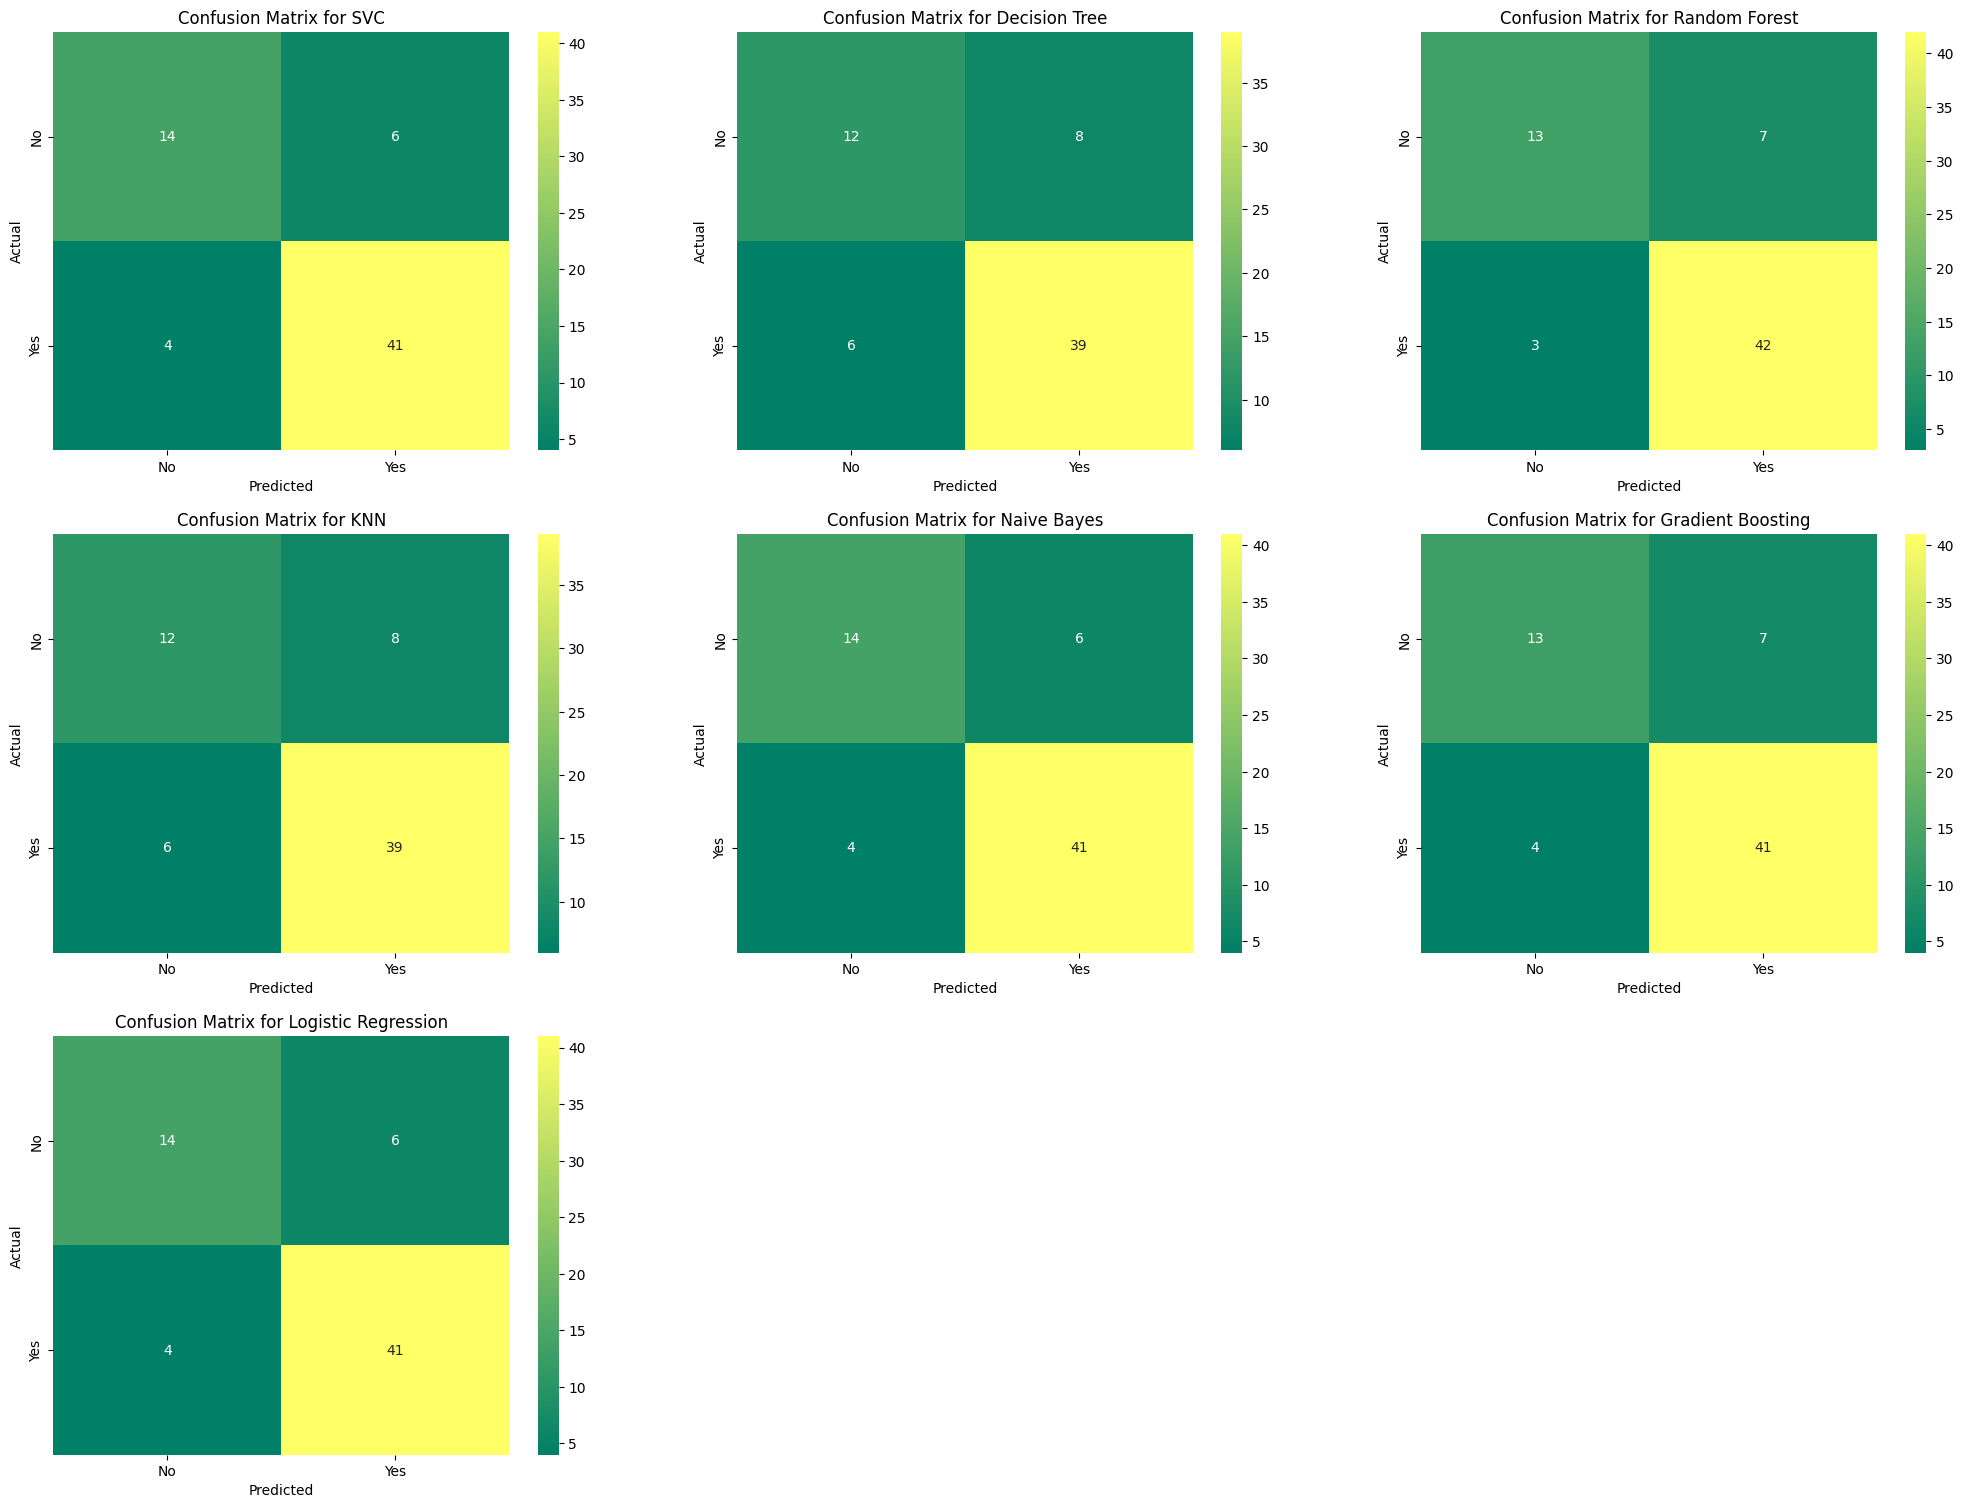

In [48]:
plt.figure(figsize=(25, 25))
for i in range(len(confusions)):
    plt.subplot(4, 3, i+1)
    fig = sns.heatmap(confusions[i], annot=True, fmt='d', cmap='summer')
    plt.title(f'Confusion Matrix for {matrix_label[i]}')
    fig.set_xticklabels(['No', 'Yes'])
    fig.set_yticklabels(['No', 'Yes'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
plt.show()

dari confusion matrix diatas model logistic regression, SVC dan Naive Bayes memiliki data yang sama persis, hal ini terjadi mungkin karena data pada dataset ini sedikit.

### Model Improvement

pada bagian ini akan dilakukan model improvement dengan menambakan hyperparameter tunning pada setiap model

In [49]:
# Menentukan parameter pada setiap model
# SVC
svc_params = {'classifier__C': [0.1, 1, 2, 3, 4, 5, 10], 
              'classifier__kernel': ['linear', 'rbf', 'poly','sigmoid'],
              'classifier__gamma': ['auto', 'scale']}

# Decision Tree
tree_params = {'classifier__criterion': ['gini', 'entropy'],
               'classifier__max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10], 
               'classifier__min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
               'classifier__min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10],
               'classifier__splitter' : ['best','random']}

# Random Forest
rf_params = {'classifier__criterion': ['gini', 'entropy'],
                 'classifier__max_features': ['auto', 'sqrt', 'log2'],
                 'classifier__n_estimators': [100, 150, 200, 250, 300, 350, 400, 500]}

# KNN
knn_params = {'classifier__n_neighbors': [3, 5, 7, 9, 11, 13], 
              'classifier__weights': ['uniform', 'distance'], 
              'classifier__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

# Naive Bayes
bayes_params = {'classifier__var_smoothing': [2e-9,1e-9, 2e-8, 1e-7, 2e-6, 1e-5, 2e-4, 1e-3, 1e-2, 1e-1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

# eXtreme Gradient Boosting             
gb_params = {'classifier__n_estimators': [50, 100, 200],
             'classifier__max_depth': [2, 4, 6],
             'classifier__min_samples_split': [0.1, 0.2, 0.3],
             'classifier__subsample': [0.5, 0.8, 1.0],
             'classifier__learning_rate': [0.01, 0.001, 0.2]
            }
# Logistic Regression
logistic_params = {'classifier__C': [2, 4, 6, 8, 10], 
                   'classifier__penalty': ['l1', 'l2'],
                   'classifier__solver': ['lbfgs', 'liblinear', 'sag'],
                   'classifier__max_iter': [300, 500, 1000]}

selanjutnya model akan ditunning menggunakan GridSearchCV dengan 5 cross-validation untuk semua model yang digunakan

In [50]:
svc = GridSearchCV(svc_pipe, param_grid=svc_params, cv=5, n_jobs=-1)
tree = GridSearchCV(tree_pipe, param_grid=tree_params, cv=5, n_jobs=-1)
rf = GridSearchCV(rf_pipe, param_grid=rf_params, cv=5, n_jobs=-1)
knn = GridSearchCV(knn_pipe, param_grid=knn_params, cv=5, n_jobs=-1)
bayes = GridSearchCV(bayes_pipe, param_grid=bayes_params, cv=5, n_jobs=-1)
gb = GridSearchCV(gb_pipe, param_grid=gb_params, cv=5, n_jobs=-1)
logistic = GridSearchCV(logistic_pipe, param_grid=logistic_params, cv=5, n_jobs=-1)

In [51]:
svc.fit(X_train, y_train)
tree.fit(X_train, y_train)
rf.fit(X_train, y_train)
knn.fit(X_train, y_train)
bayes.fit(X_train, y_train)
gb.fit(X_train, y_train)
logistic.fit(X_train, y_train)

c:\Users\salma\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\salma\AppData\Local\Programs\Python\Python310\lib\site-packages\imblearn\pipeline.py:297: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, yt, **fit_params_last_step)
c:\Users\salma\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\salma\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validati

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('outlier',
                                                                                          Winsorizer(capping_method='iqr',
                                                                                                     fold=1.5,
                                                                                                     tail='both',
                                                                                                     variables=['hsc_percentage',
                                                                                                                'degree_percentage'])),
                                                                                         ('scaling',
                                                                                          StandardScaler())]),
                                                                         Index(['ssc_percentage', 'hsc_percentage', 'degree_percentage',
       'emp_test_percentage', 'mba_percent'],
      dtype='object')),
                                                                        ('cat',
                                                                         Pipeline(steps=[('encode',
                                                                                          OneHotEncoder())]),
                                                                         Index(['specialisation'], dtype='object'))])),
                                       ('classifier', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'classifier__C': [2, 4, 6, 8, 10],
                         'classifier__max_iter': [300, 500, 1000],
                         'classifier__penalty': ['l1', 'l2'],
                         'classifier__solver': ['lbfgs', 'liblinear', 'sag']})

### Model Evaluation (Improvement)

Pada bagian ini dilakukan model evaluation untuk mengetahui model mana yang memiliki performance yang bagus untuk digunakan, hasil dari classification report adalah hasil tunning

In [52]:
print('Training Score:', svc.score(X_train, y_train))
print('Test Score:', svc.score(X_test, y_test))
print('------------------------------------------------------')
print(classification_report(y_test, svc.predict(X_test)))

Training Score: 0.8733333333333333
Test Score: 0.8307692307692308
------------------------------------------------------
              precision    recall  f1-score   support

  Not Placed       0.70      0.80      0.74        20
      Placed       0.90      0.84      0.87        45

    accuracy                           0.83        65
   macro avg       0.80      0.82      0.81        65
weighted avg       0.84      0.83      0.83        65



pada model SVC yang sudah di tunning memiliki train score 0.87 dan test score 0.83 model ini menunjukan goodfitting, memiliki akurasi 0.83, recall 0.82 dan precision 0.80

In [53]:
print('Training Score:', tree.score(X_train, y_train))
print('Test Score:', tree.score(X_test, y_test))
print('------------------------------------------------------')
print(classification_report(y_test, tree.predict(X_test)))

Training Score: 0.8066666666666666
Test Score: 0.8
------------------------------------------------------
              precision    recall  f1-score   support

  Not Placed       0.77      0.50      0.61        20
      Placed       0.81      0.93      0.87        45

    accuracy                           0.80        65
   macro avg       0.79      0.72      0.74        65
weighted avg       0.80      0.80      0.79        65



pada model Decision Tree yang sudah di tunning memiliki train score 0.80 dan test score 0.80 model ini menunjukan goodfitting, memiliki akurasi 0.80, recall 0.72 dan precision 0.79

In [54]:
print('Training Score:', rf.score(X_train, y_train))
print('Test Score:', rf.score(X_test, y_test))
print('------------------------------------------------------')
print(classification_report(y_test, rf.predict(X_test)))

Training Score: 1.0
Test Score: 0.8461538461538461
------------------------------------------------------
              precision    recall  f1-score   support

  Not Placed       0.78      0.70      0.74        20
      Placed       0.87      0.91      0.89        45

    accuracy                           0.85        65
   macro avg       0.83      0.81      0.81        65
weighted avg       0.84      0.85      0.84        65



pada model Random Forest memiliki train score 1.0 dan test score 0.84 model ini mengalami overfitting, memiliki akurasi 0.85, recall 0.81 dan precision 0.83

In [55]:
print('Training Score:', knn.score(X_train, y_train))
print('Test Score:', knn.score(X_test, y_test))
print('------------------------------------------------------')
print(classification_report(y_test, knn.predict(X_test)))

Training Score: 0.9133333333333333
Test Score: 0.7846153846153846
------------------------------------------------------
              precision    recall  f1-score   support

  Not Placed       0.67      0.60      0.63        20
      Placed       0.83      0.87      0.85        45

    accuracy                           0.78        65
   macro avg       0.75      0.73      0.74        65
weighted avg       0.78      0.78      0.78        65



pada model KNN memiliki train score 0.91 dan test score 0.78 model ini mengalami overfitting, memiliki akurasi 0.78, recall 0.73 dan precision 0.75

In [56]:
print('Training Score:', bayes.score(X_train, y_train))
print('Test Score:', bayes.score(X_test, y_test))
print('------------------------------------------------------')
print(classification_report(y_test, bayes.predict(X_test)))

Training Score: 0.8333333333333334
Test Score: 0.8461538461538461
------------------------------------------------------
              precision    recall  f1-score   support

  Not Placed       0.86      0.60      0.71        20
      Placed       0.84      0.96      0.90        45

    accuracy                           0.85        65
   macro avg       0.85      0.78      0.80        65
weighted avg       0.85      0.85      0.84        65



pada model Naive Bayes memiliki train score 0.83 dan test score 0.884 model ini mengalami underfitting, memiliki akurasi 0.85, recall 0.78 dan precision 0.85

In [57]:
print('Training Score:', gb.score(X_train, y_train))
print('Test Score:', gb.score(X_test, y_test))
print('------------------------------------------------------')
print(classification_report(y_test, gb.predict(X_test)))

Training Score: 0.9866666666666667
Test Score: 0.8461538461538461
------------------------------------------------------
              precision    recall  f1-score   support

  Not Placed       0.81      0.65      0.72        20
      Placed       0.86      0.93      0.89        45

    accuracy                           0.85        65
   macro avg       0.83      0.79      0.81        65
weighted avg       0.84      0.85      0.84        65



pada model gradient boosting memiliki train score 0.98 dan test score 0.84 model ini mengalami overfitting, memiliki akurasi 0.85, recall 0.79 dan precision 0.83

In [58]:
print('Training Score:', logistic.score(X_train, y_train))
print('Test Score:', logistic.score(X_test, y_test))
print('------------------------------------------------------')
print(classification_report(y_test, logistic.predict(X_test)))

Training Score: 0.8666666666666667
Test Score: 0.8461538461538461
------------------------------------------------------
              precision    recall  f1-score   support

  Not Placed       0.75      0.75      0.75        20
      Placed       0.89      0.89      0.89        45

    accuracy                           0.85        65
   macro avg       0.82      0.82      0.82        65
weighted avg       0.85      0.85      0.85        65



pada model Logistic Regression memiliki train score 0.86 dan test score 0.84 model ini menunjukan goodfitting, memiliki akurasi 0.85, recall 0.82 dan precision 0.82

In [59]:
# Membuat matrix confusion dari setiap model (dengan hyperparameter)
confusions2 = [confusion_matrix(y_test, svc.predict(X_test)),
              confusion_matrix(y_test, tree.predict(X_test)),
              confusion_matrix(y_test, rf.predict(X_test)),
              confusion_matrix(y_test, knn.predict(X_test)),
              confusion_matrix(y_test, bayes.predict(X_test)),
              confusion_matrix(y_test, gb.predict(X_test)),
              confusion_matrix(y_test, logistic.predict(X_test))]

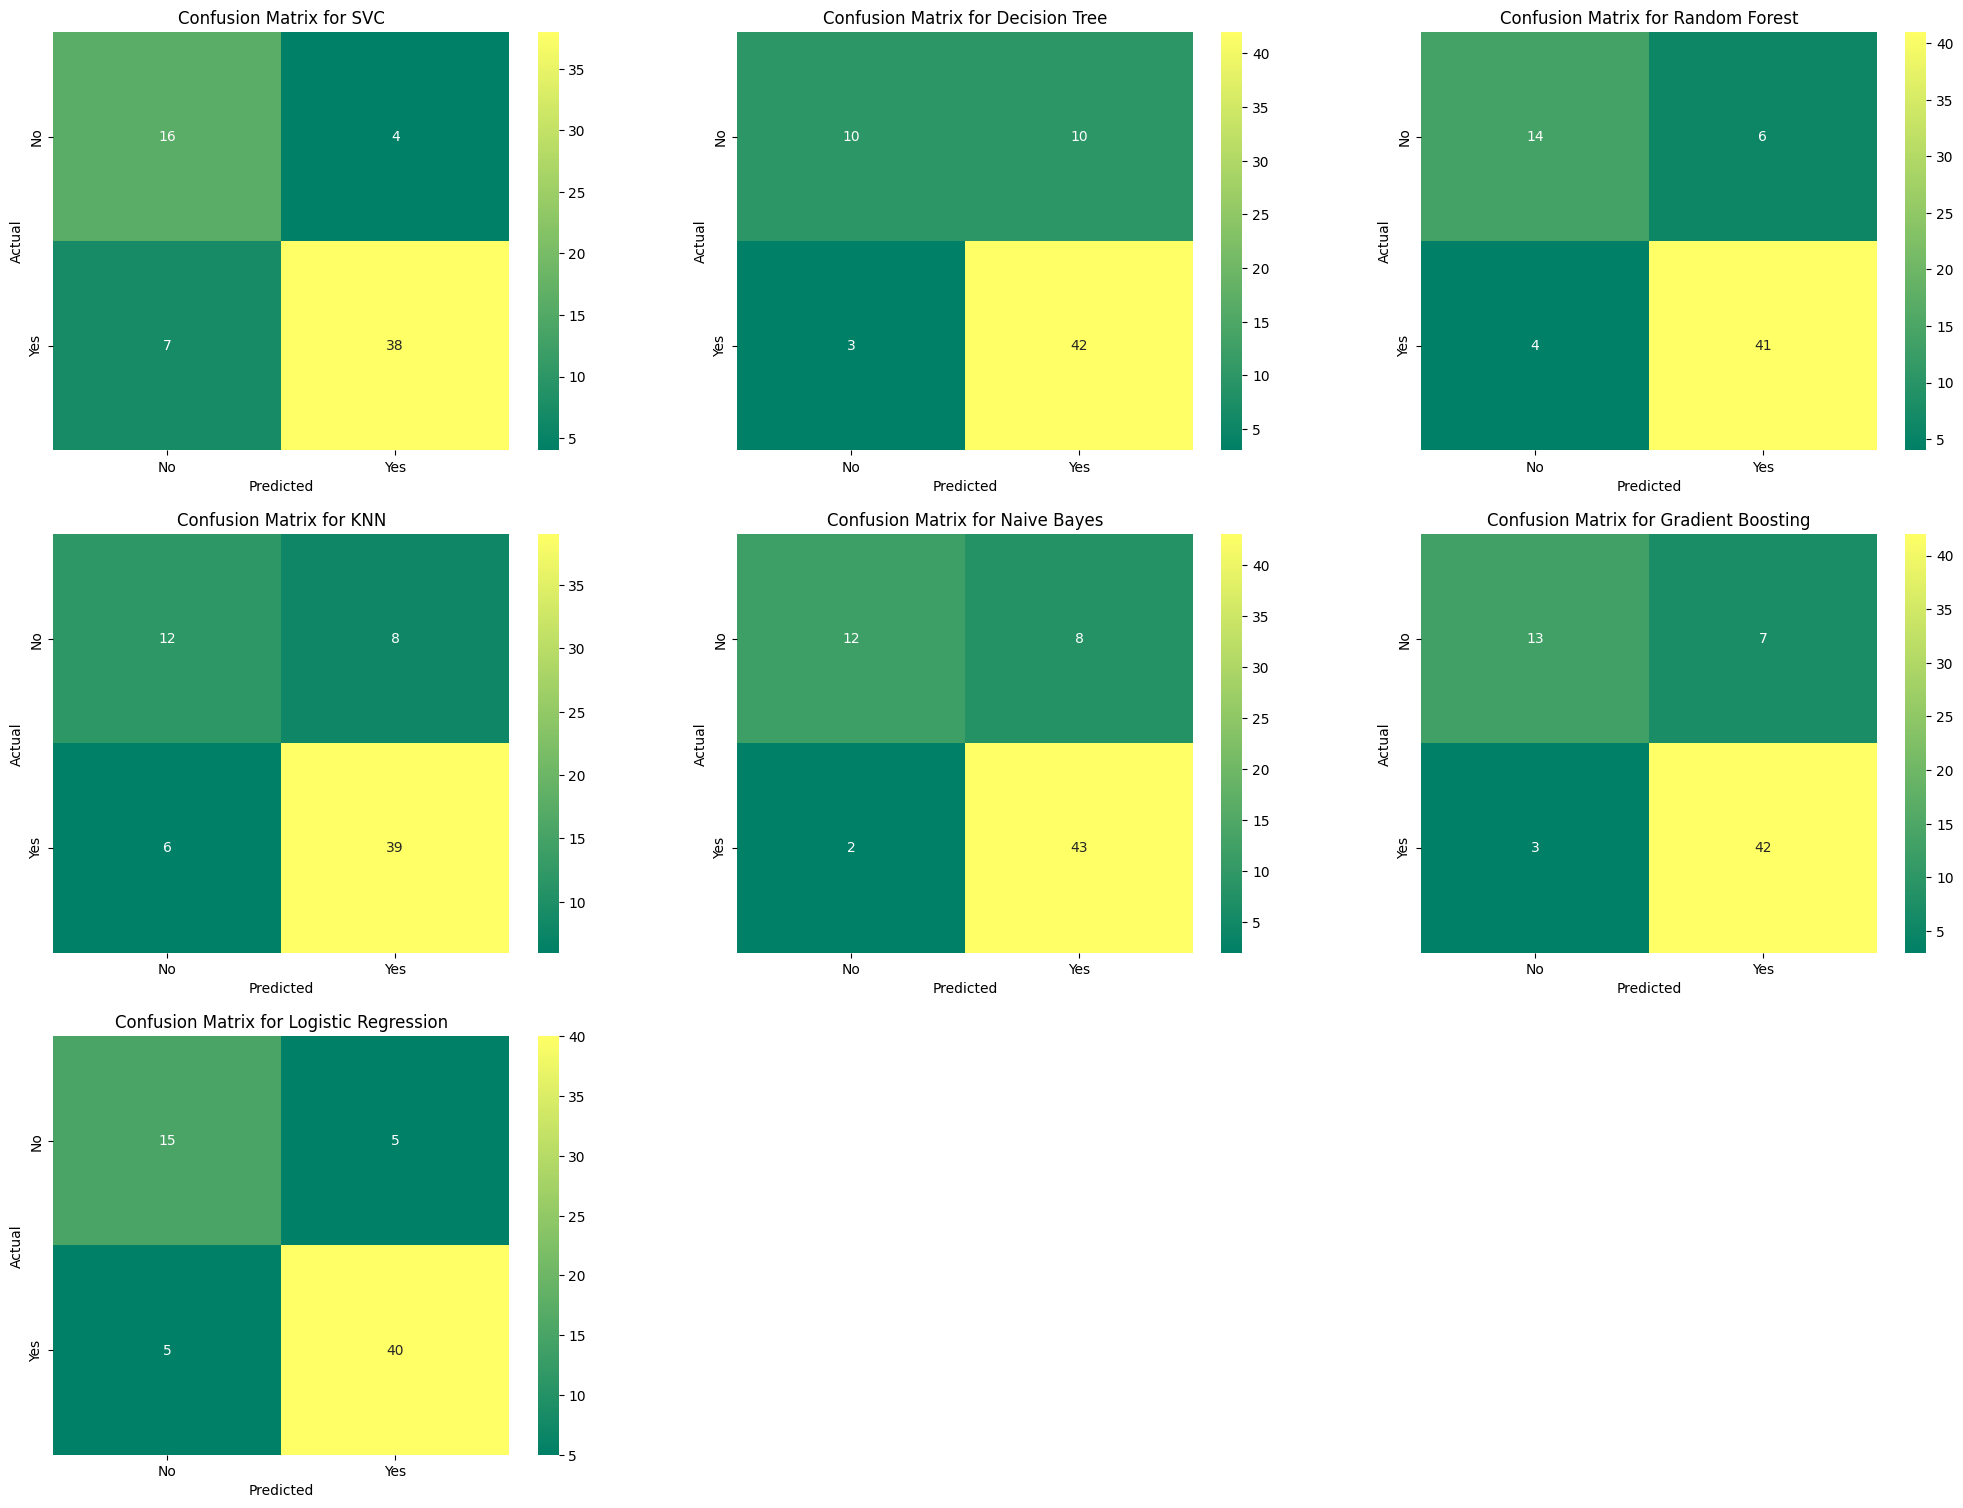

In [60]:
plt.figure(figsize=(25, 25))
for i in range(len(confusions2)):
    plt.subplot(4, 3, i+1)
    fig = sns.heatmap(confusions2[i], annot=True, fmt='d', cmap='summer')
    plt.title(f'Confusion Matrix for {matrix_label[i]}')
    fig.set_xticklabels(['No', 'Yes'])
    fig.set_yticklabels(['No', 'Yes'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
plt.show()

### Overall Analysis Model Evaluation

Dari hasil evaluasi antara base model dan model improvement, pada base model, performance terbaik ada pada logistic regression denga train score 0.87 dan test score 0.84 model ini menjadi satu satunya model yang menunjukan goodfitting, terdapat 5 model yang mengalami overfitting yaitu SVC, Decision Tree, Random Forest, KNN, dan gradient boosting, lalu naive bayes mengalami underfitting namun memiliki train score dan test score sangat tipis yaitu 0.84 dan 0.846 dimana train score lebih kecil dari test score, pada model improvement semua model dilakukan hyperparameter tunning dengan hasil hampir semua model mengalami peningkatan performance seperti svc dan decision tree dimana pada base model menunjukan score yang overfitting setelah dilakukan tunning menjadi goodfitting, knn dan naive bayes tidak mengalami peningkatan, gradient boosting mengalami peningkatan performance namun masih overfitting, dan logistic regression masih tetap goodfitting namun dengan selisih score train dan test menipis

## Model Saving

In [62]:
with open('model_logistic.pkl', 'wb') as file_model:
  pickle.dump(logistic, file_model)

## Model Inference

Dilakukan pada notebook terpisah dengan nama file `inference.ipynb`

Deployment : [Job Placement Prediction](https://huggingface.co/spaces/salmanfaishal27/Job-Placement-Prediction)

## Pengambilan Kesimpulan

Dataset yang digunakan pada project ini adalah job placement dataset dimana perusahaan ingin melakukan rekrutment namun menginginkan kualitas sdm yang memiliki nilai bagus dan jurusan yang sesuai dengan posisi pekerjaannya, terlihat pada EDA bahwa ketika seseorang memiliki nilai yang tinggi pada `ssc_percentage`, `hsc_percentage`, `degree_percentage` tingkat diterimanya cenderung tinggi, di sisi lain `work_experience` dan `specialisation` juga berpengaruh pada tingkat diterimanya pelamar, karena faktor faktor tersebut yang bisa membuat seseorang diterima bekerja atau tidak maka kolom kolom tersebut yang di jadikan feature untuk dilatih pada model machine learning.

pada kasus ini perushaan menginginkan pelamar yang memiliki kualitas terbaik sehingga dibutuhkan model classification yang difokuskan ke nilai recall, karena jika perusahaan mendapatkan pelamar yang kualitasnya dibawah standar perusahaan dan terprediksi kualitasnya bagus maka perusahaan akan mengalami kerugian seperti pengerjaan tugas yang terlambat karena ketidak mampuan pegawai, sehingga nilai recall atau false negatif harus ditingkatkan (nilai kesalahan prediksi diminimalkan atau dihilangkan)

kemudian dibuat 7 model yang berbeda dengan hyperparameter tunning yaitu `SVC`, `KNN`, `Naive Bayes`, `Logistic Regression`, `Decision Tree`, `Random Forest`,  `Gradient Boosting` dimana model dengan performance terbaik adalah `Logistic Regression` dengan hyperparameter (C = 2, max_iter = 300, penalty = l2, dan solver = lbfgs) model ini memiliki train score 0.87 dan test score 0.84, akurasi 0.85 dan rata rata nilai precision dan recall 0.82